In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import tqdm
from time import sleep
from PIL import Image
from io import BytesIO
from adjustText import adjust_text


In [2]:
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name, get_teams, find_team_name_by_id
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder

In [3]:
teams = get_teams()

In [4]:
teams[0]

{'id': 1610612737,
 'full_name': 'Atlanta Hawks',
 'abbreviation': 'ATL',
 'nickname': 'Hawks',
 'city': 'Atlanta',
 'state': 'Atlanta',
 'year_founded': 1949}

In [5]:
game_finder = LeagueGameFinder(league_id_nullable="00", season_type_nullable="Regular Season")

In [6]:
games = game_finder.get_data_frames()[0]
#PlayByPlayV2(game_id=0)

In [32]:
cur_season_games = games.loc[(games.TEAM_ABBREVIATION == "LAL") & (games.SEASON_ID == "22019")]

In [33]:
cur_season_games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
19,22019,1610612747,LAL,Los Angeles Lakers,0021900968,2020-03-10,LAL vs. BKN,L,241,102,...,0.583,8,38,46,24,7,4,14,22,-3.2
44,22019,1610612747,LAL,Los Angeles Lakers,0021900948,2020-03-08,LAL @ LAC,W,241,112,...,0.857,9,36,45,22,8,7,12,28,9.0
81,22019,1610612747,LAL,Los Angeles Lakers,0021900939,2020-03-06,LAL vs. MIL,W,240,113,...,0.816,10,42,52,19,11,4,16,27,10.0
119,22019,1610612747,LAL,Los Angeles Lakers,0021900915,2020-03-03,LAL vs. PHI,W,240,120,...,0.833,10,33,43,25,9,6,13,18,13.0
150,22019,1610612747,LAL,Los Angeles Lakers,0021900900,2020-03-01,LAL @ NOP,W,240,122,...,0.900,6,30,36,23,9,10,13,26,8.0
166,22019,1610612747,LAL,Los Angeles Lakers,0021900891,2020-02-29,LAL @ MEM,L,241,88,...,0.583,13,32,45,26,5,3,14,13,-17.0
194,22019,1610612747,LAL,Los Angeles Lakers,0021900876,2020-02-27,LAL @ GSW,W,241,116,...,0.667,8,36,44,24,13,5,16,17,30.0
229,22019,1610612747,LAL,Los Angeles Lakers,0021900861,2020-02-25,LAL vs. NOP,W,239,118,...,0.714,14,37,51,27,10,12,16,20,9.0
252,22019,1610612747,LAL,Los Angeles Lakers,0021900842,2020-02-23,LAL vs. BOS,W,239,114,...,0.676,11,35,46,20,9,4,13,22,2.0
288,22019,1610612747,LAL,Los Angeles Lakers,0021900833,2020-02-21,LAL vs. MEM,W,240,117,...,0.650,12,37,49,25,9,14,14,24,12.0


In [34]:
import time

In [35]:
play_by_plays = []
for game_id in tqdm.tqdm(cur_season_games.GAME_ID.unique()):
    pbp = PlayByPlayV2(game_id=game_id)
    play_by_plays.append(pbp)
    time.sleep(0.5)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [01:25<00:00,  1.36s/it]


In [39]:
concated = pd.concat([pbp.get_data_frames()[0] for pbp in play_by_plays], ignore_index=True)

In [41]:
concated.to_csv('lal_pbp.csv')

In [18]:
pbp = PlayByPlayV2(game_id="0021900968")

In [20]:
pbp_df = pbp.get_data_frames()[0]

In [42]:
teams[0]

{'id': 1610612737,
 'full_name': 'Atlanta Hawks',
 'abbreviation': 'ATL',
 'nickname': 'Hawks',
 'city': 'Atlanta',
 'state': 'Atlanta',
 'year_founded': 1949}

In [43]:
all_data_frames = []
for team in teams:
    cur_season_games = games.loc[(games.TEAM_ID == team['id']) & (games.SEASON_ID == "22019")]
    for game_id in tqdm.tqdm(cur_season_games.GAME_ID.unique(), desc=f"Fetching games by {team['full_name']}"):
        pbp = PlayByPlayV2(game_id=game_id)
        all_data_frames.append(pbp.get_data_frames()[0])
        time.sleep(0.5)

Fetching games by Charlotte Hornets: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [01:20<00:00,  1.24s/it]


In [44]:
concated = pd.concat(all_data_frames, ignore_index=True)
concated.to_csv('play_by_plays/all_pbps.csv')

In [47]:
concated.groupby("GAME_ID").sum()

,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,PERSON1TYPE,PLAYER1_ID,PLAYER1_TEAM_ID,PERSON2TYPE,PLAYER2_ID,PLAYER2_TEAM_ID,PERSON3TYPE,PLAYER3_ID,PLAYER3_TEAM_ID,VIDEO_AVAILABLE_FLAG
GAME_ID,,,,,,,,,,,,,,
0021900001,457812,4638,20860,3066,4882.0,110695178200,1.694365e+12,1558,397844134,5.572720e+11,322,37031216,4.509716e+10,952
0021900002,320558,3818,16252,2316,3990.0,87316290770,1.381906e+12,1416,121799292,5.089536e+11,272,10164596,4.509716e+10,772
0021900003,352988,3976,11700,2494,4310.0,100913296122,1.475321e+12,1562,393597430,5.540508e+11,194,17917020,2.899103e+10,726
0021900004,352064,4012,19264,2536,4224.0,87792938558,1.462436e+12,1592,316542280,5.669357e+11,262,19522928,4.187593e+10,716
0021900005,309786,3648,13582,2342,3972.0,84405960494,1.369021e+12,1370,246966448,4.896263e+11,162,15053062,2.899103e+10,744
0021900006,445336,4460,19182,3116,4742.0,149055125012,1.613834e+12,1506,314901662,5.315022e+11,278,3258658362,4.831838e+10,906
0021900007,440848,4590,16398,2784,4716.0,104328530270,1.633161e+12,1660,473396672,5.894843e+11,340,32161150,5.153961e+10,890
0021900008,434328,4674,19560,2844,4698.0,129663451612,1.623498e+12,1626,298637608,5.830418e+11,262,21167636,3.221225e+10,886
0021900009,350908,4142,16946,2502,4310.0,84709401554,1.488206e+12,1466,334241814,5.250598e+11,252,23608062,2.899103e+10,794


In [48]:
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats

In [50]:
stats = LeagueDashTeamStats()

In [53]:
stats.get_data_frames()[0].GP.sum()

1942

In [57]:
len(games.loc[games.SEASON_ID == "22019"].GAME_ID.unique())

971

In [59]:
dropped_concated = concated.drop_duplicates(keep='first')

In [60]:
dropped_concated.to_csv('play_by_plays/all_pbps_no_dups.csv')

## Loaded

In [4]:
pbp_df = pd.read_csv('play_by_plays/all_pbps_no_dups.csv')

In [9]:
pbp_df = pbp_df.loc[:, pbp_df.columns[1:]]

In [11]:
pbp_df.to_csv('play_by_plays/all_pbps_no_dups.csv')

In [13]:
non_cleaned = pd.read_csv('play_by_plays/all_pbps.csv')

In [21]:
non_cleaned = non_cleaned.loc[:, non_cleaned.columns[1:]]

In [23]:
non_cleaned.loc[(non_cleaned.GAME_ID == 21900969) & (non_cleaned.EVENTNUM == 6)]

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
3,21900969,6,4,0,1,7:42 PM,11:45,Dedmon REBOUND (Off:0 Def:1),NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,1
466256,21900969,6,4,0,1,7:42 PM,11:45,Dedmon REBOUND (Off:0 Def:1),NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,1


In [25]:
dropped_dups = non_cleaned.drop_duplicates()

In [51]:
dropped_dups.loc[(dropped_dups.GAME_ID == 21900969) & (dropped_dups.EVENTNUM == 10)]

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
6,21900969,10,2,102,1,7:43 PM,11:30,MISS Young 16' Driving Floating Bank Jump Shot,NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,1


In [29]:
dropped_dups.to_csv('play_by_plays/pbp_cleaned.csv')

## Finding timeout

## Filtering out junk types

In [3]:
dropped_dups = pd.read_csv('play_by_plays/pbp_cleaned.csv')

In [4]:
dropped_dups = dropped_dups.loc[:, dropped_dups.columns[1:]]

In [5]:
dropped_dups = dropped_dups.loc[(dropped_dups.EVENTMSGTYPE != 18) & (dropped_dups.EVENTMSGTYPE != 11)]

In [6]:
timeouts = dropped_dups.loc[dropped_dups.EVENTMSGTYPE == 9]

In [7]:
filtered = timeouts.head()

## Play types

* 1: made shot
* 2: missed shot
* 3: free throw -> Filter out
* 5: turnover/steal -> Gledaj player1 team_id
* 6: Foul, we will group by EVENTMSGTYPE
    * 1: Normal foul, Depends on Penalty or not. 
    * 2: Shooting foul, successful play
    * 3, 6: We can do same as for Normal foul
    * 14: Flagrant foul, successfull play



Filter BEFORE Grouping Timeouts:
* 11: Ejection, lol -> filter out
* 18: JUNK JUNK JUNK

Filter in the Func (Ignore):
* 8: Sub -> filter
* 9: Timeout -> filter
* 6: Foul
    * 4: offensive foul -> TURNOVER (proceed to eventmsgtype=5) Filtered out
    * 26: Offensive foul -> Charge, TURNOVER (proceed to eventmsgtype=5), Filter out in function
* 7: Violation -> Ignore I guess?

Delete after the Grouping of after plays:
* 13: Time ran out -> Either mark as negative, or nullify
* 10: Jump Ball -> We will ignored the timeout and the play
* 4: Rebound -> Delete after grouping
* 3: free throw -> Filter out
* 6: Foul
    * 11: Tehnical foul -> Delete later
    * 16, 18: Delete after
    * 17: Tehnical foul (3 sec) -> Delete later
    * 28 Take foul -> meaning that this is intentional foul, when in bonus, filter out after grouping

In [9]:
def filter_func(row):
    next_play = dropped_dups.loc[
        (dropped_dups.index > row.name) & 
        (dropped_dups.EVENTMSGTYPE != 8) & 
        (dropped_dups.EVENTMSGTYPE != 18)].iloc[0]
    next_play['TIMEOUT_GAME_ID'] = next_play.GAME_ID
    next_play['TIMEOUT_EVENTNUM'] = row.EVENTNUM
    return next_play

In [371]:
def filter_value(item):
    next_play = dropped_dups.loc[
        (dropped_dups.index > item.name) & (
        (dropped_dups.EVENTMSGTYPE == 1) |
        (dropped_dups.EVENTMSGTYPE == 2) |
        (dropped_dups.EVENTMSGTYPE == 3) |
        (dropped_dups.EVENTMSGTYPE == 5) |
        ((dropped_dups.EVENTMSGTYPE == 6) & (dropped_dups.EVENTMSGACTIONTYPE.isin([1, 2, 3, 6, 14]))))].iloc[0]
    next_play['TIMEOUT_GAME_ID'] = next_play.GAME_ID
    next_play['TIMEOUT_EVENTNUM'] = item.EVENTNUM
    return next_play

In [11]:
tqdm.tqdm.pandas()

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\tqdm\_tqdm.py:634: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [12]:
ato_plays_no_filter = timeouts.progress_apply(filter_func, axis=1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10905/10905 [10:32<00:00, 17.23it/s]


In [14]:
ato_plays_no_filter.to_csv('play_by_plays/ato_all_actions.csv')

Delete after the Grouping of after plays:
* 13: Time ran out -> Either mark as negative, or nullify
* 10: Jump Ball -> We will ignored the timeout and the play
* 4: Rebound -> Delete after grouping
* 3: free throw -> Filter out
* 6: Foul
    * 11: Tehnical foul -> Delete later
    * 16, 18: Delete after
    * 17: Tehnical foul (3 sec) -> Delete later
    * 28 Take foul -> meaning that this is intentional foul, when in bonus, filter out after grouping

In [374]:
ato_plays.to_csv('play_by_plays/ato_non_filtered.csv')

In [378]:
filtered_ato = ato_plays.loc[
    (ato_plays.EVENTMSGTYPE != 13) & 
    (ato_plays.EVENTMSGTYPE != 10) & 
    (ato_plays.EVENTMSGTYPE != 4) & 
    (ato_plays.EVENTMSGTYPE != 3)
]

In [381]:
filtered_ato.to_csv('play_by_plays/ato_filtered.csv')

In [384]:
timeouts.iloc[0]

GAME_ID                                                     21900969
EVENTNUM                                                          46
EVENTMSGTYPE                                                       9
EVENTMSGACTIONTYPE                                                 1
PERIOD                                                             1
WCTIMESTRING                                                 7:46 PM
PCTIMESTRING                                                    8:19
HOMEDESCRIPTION              HAWKS Timeout: Regular (Full 1 Short 0)
NEUTRALDESCRIPTION                                               NaN
VISITORDESCRIPTION                                               NaN
SCORE                                                            NaN
SCOREMARGIN                                                      NaN
PERSON1TYPE                                                        2
PLAYER1_ID                                                1610612737
PLAYER1_NAME                      

In [387]:
timeouts_short = timeouts.loc[:, ["GAME_ID", "EVENTNUM", "EVENTMSGTYPE", "PERSON1TYPE", "PLAYER1_ID"]]

In [390]:
timeouts_short = timeouts_short.rename(columns={'PLAYER1_ID': 'TIMEOUT_TEAM_ID'})

In [404]:
team_names = timeouts_short.apply(lambda x: find_team_name_by_id(int(x.TIMEOUT_TEAM_ID))['full_name'], axis=1).tolist()

In [405]:
timeouts_short.loc[:, "TEAM_NAME"] = team_names

In [407]:
team_abbrev = timeouts_short.apply(lambda x: find_team_name_by_id(int(x.TIMEOUT_TEAM_ID))['abbreviation'], axis=1).tolist()

In [409]:
timeouts_short.loc[:, "TEAM_ABBREVIATION"] = team_abbrev

In [411]:
timeouts_short.to_csv('play_by_plays/timeouts_shortened.csv')

## Merging the data

In [418]:
merged_data = pd.merge(left=timeouts_short, right=filtered_ato, left_on=(['GAME_ID', 'EVENTNUM']), right_on=(['GAME_ID', 'TIMEOUT_EVENTNUM']), suffixes=('_TO', '_PLAY'))

In [419]:
merged_data.to_csv('play_by_plays/merged_data.csv')

#### Loading

In [6]:
merged_data = pd.read_csv('play_by_plays/merged_data.csv')

In [7]:
team_events = merged_data.groupby('TEAM_NAME').EVENTMSGTYPE_PLAY.value_counts()

In [8]:
all_shots = team_events[:, 1] + team_events[:, 2] 

In [9]:
made_shots = team_events[:, 1]

In [10]:
missed_shots = team_events[:, 2]

In [11]:
turnovers = team_events[:, 5]

In [12]:
all_actions = team_events[:, 1] + team_events[:, 2] + team_events[:, 5]

In [13]:
team_eff = made_shots / all_shots

In [14]:
team_all_eff = made_shots / all_actions

In [15]:
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats

In [16]:
team_stats = LeagueDashTeamStats().get_data_frames()[0]

In [17]:
interesting_data = team_stats.loc[:, ["TEAM_NAME", "W_PCT"]]

### Finding team efficiency

In [18]:
team_efficiency = team_all_eff.to_frame()

In [19]:
merged_data = pd.merge(left=interesting_data, right=team_efficiency, on="TEAM_NAME")

In [20]:
plt.style.use('fivethirtyeight')

In [21]:
merged_data.W_PCT = merged_data.W_PCT * 100

In [22]:
merged_data.EVENTMSGTYPE_PLAY = merged_data.EVENTMSGTYPE_PLAY * 100

In [23]:
from adjustText import adjust_text

In [189]:
# diverging

light_blue = "#C7E8F3"
wisteria = "#BF9ACA"
rifle_green = '#45462A'
quinarcidone_magenta = '#8E4162'
amaranth_pink = '#EDA2C0'
wisteria = '#BF9ACA'

# Second one

thistle = '#DDBDD5'
lilac_luster = '#AC9FBB'
black_coral = '#59656F'
baby_pink = '#F4CBC6'
melon = '#F4AFAB'

# Strong
flame = '#EC4E20'
spanish_blue = '#016FB9'


# other
maximum_yellow_red = '#E3B23C'
middle_blue = '#92DCE5'
space_cadet = '#2B2D42'

# Charting
light_cyan = '#CCFBFE'
old_rose = '#CD8987'
inchworm = '#B0FE76'

In [190]:
# triadic
copper_penny = '#AE676A'
razzle_dazzle_rose = '#F147C3'
olive_green = '#BBBE64'
royal_blue = '#4166DB'
screamin_green = '#79F062'

In [191]:
bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'

spanish_gray = '#989C94'
olive_green = '#BBBE64'
gold_fusion = '#73683B'
copper = '#A8763E'
burgundy = '#721121'
queen_pink = '#ECCBD9'

baby_pink = '#EBBAB9'
morning_blue = '#97B1A6'
brown = '#7E5920'
rifle_green = '#45462A'

32

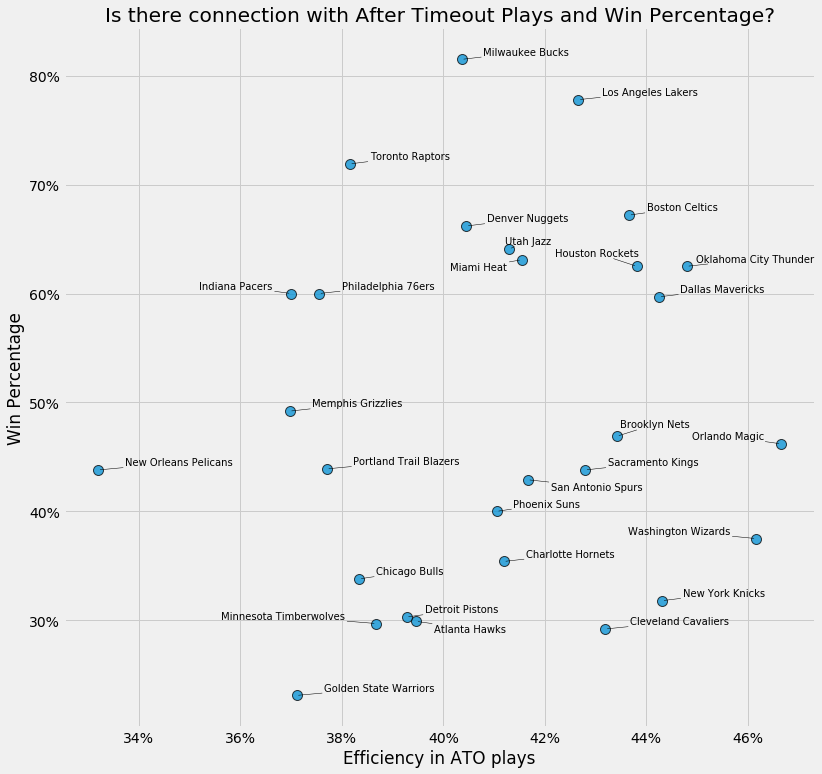

In [27]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.scatter(x=merged_data.EVENTMSGTYPE_PLAY, y=merged_data.W_PCT, s=100, alpha=0.75, edgecolors='black', lw=1)
ax.set_xlabel("Efficiency in ATO plays")
ax.set_ylabel("Win Percentage")
ax.set_title("Is there connection with After Timeout Plays and Win Percentage?")

ax.set_xticklabels([f"{item}%" for item in range(32, 52, 2)])
ax.set_yticklabels([f"{item}%" for item in range(20, 90, 10)])

texts = []
for index in range(len(merged_data)):
    item = merged_data.iloc[index]
    texts.append(ax.text(x=item.EVENTMSGTYPE_PLAY, y=item.W_PCT, s=item.TEAM_NAME, size=10))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'), expand_points=(1.5, 1.5))

32

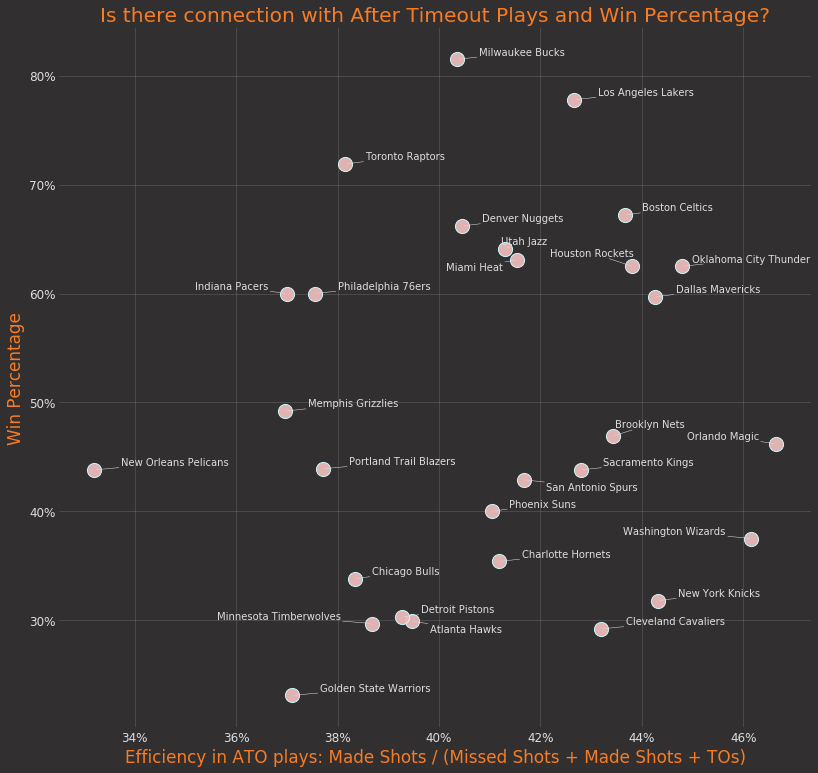

In [29]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.scatter(x=merged_data.EVENTMSGTYPE_PLAY, y=merged_data.W_PCT, s=200, alpha=0.95, edgecolors=light_cyan, lw=1, color=baby_pink)
ax.set_xlabel("Efficiency in ATO plays: Made Shots / (Missed Shots + Made Shots + TOs)", color=bball_orange)
ax.set_ylabel("Win Percentage", color=bball_orange)
ax.set_title("Is there connection with After Timeout Plays and Win Percentage?", color=bball_orange)

ax.set_xticklabels([f"{item}%" for item in range(32, 52, 2)], size=12)
ax.set_yticklabels([f"{item}%" for item in range(20, 90, 10)], size=12)

texts = []
for index in range(len(merged_data)):
    item = merged_data.iloc[index]
    texts.append(ax.text(x=item.EVENTMSGTYPE_PLAY, y=item.W_PCT, s=item.TEAM_NAME, size=10, color=bball_white))

ax.set_facecolor(bball_gray)
fig.set_facecolor(bball_gray)
ax.set_frame_on(False)
ticks = ax.get_xticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ticks = ax.get_yticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ax.grid(b=True, color=bball_white, alpha=0.3, lw=0.5)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color=bball_white), expand_points=(1.5, 1.5))

## Bar Chart

In [32]:
made_pct = made_shots / all_actions

In [33]:
missed_pct = missed_shots / all_actions

In [34]:
to_pct = turnovers / all_actions

In [35]:
concated_pcts = pd.concat([made_pct.to_frame(), missed_pct.to_frame(), to_pct.to_frame()], axis=1)


In [36]:
concated_pcts.columns = ['MADE_PCT', 'MISSED_PCT', 'TO_PCT']

In [37]:
thistle = '#DDBDD5'
lilac_luster = '#AC9FBB'
black_coral = '#59656F'
baby_pink = '#F4CBC6'

In [38]:
concated_pcts = concated_pcts.sort_values(by='MADE_PCT')

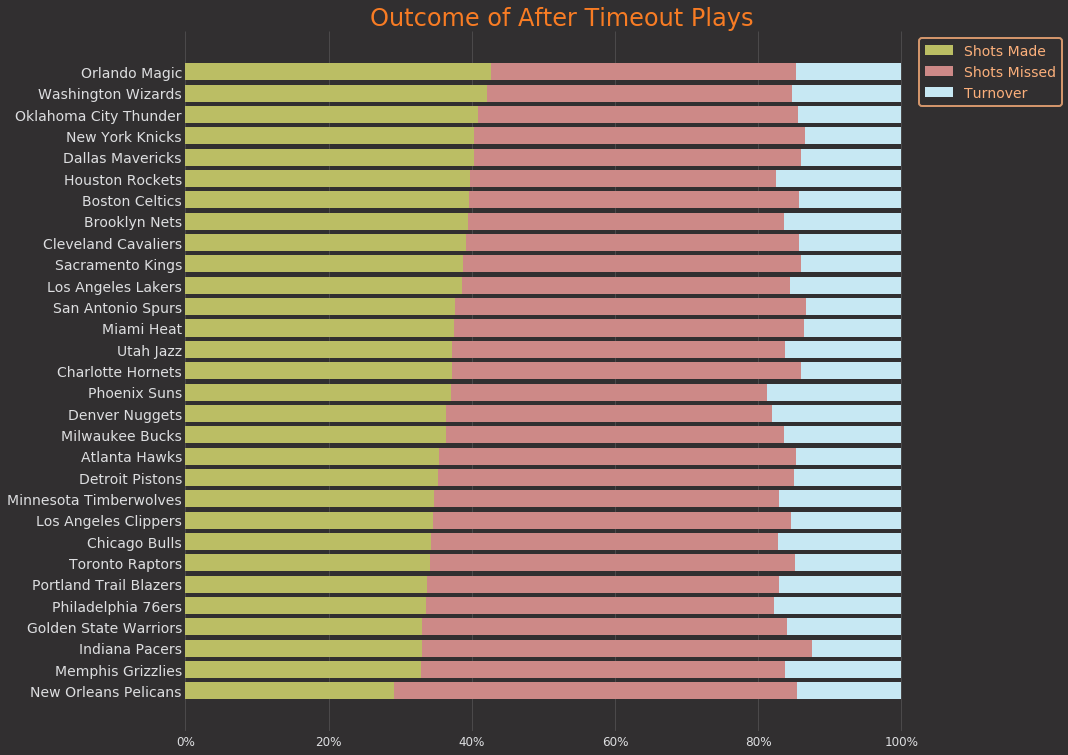

In [39]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.barh(y=concated_pcts.index, width=concated_pcts.MADE_PCT, label='Shots Made', color=olive_green)
ax.barh(y=concated_pcts.index, width=concated_pcts.MISSED_PCT, left=concated_pcts.MADE_PCT, label='Shots Missed', color=old_rose)
ax.barh(y=concated_pcts.index, width=concated_pcts.TO_PCT, left=concated_pcts.MADE_PCT + concated_pcts.MISSED_PCT, color=light_blue, label='Turnover')

ax.set_title("Outcome of After Timeout Plays", color=bball_orange, size=24)

ax.set_xticklabels([f"{item}%" for item in range(0, 110, 20)], size=12)
ax.set_facecolor(bball_gray)
fig.set_facecolor(bball_gray)
ax.set_frame_on(False)
ticks = ax.get_xticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ticks = ax.get_yticklabels()
for tick in ticks:
    tick.set_color(bball_white)

legend = ax.legend(loc='upper right', bbox_to_anchor=(1.175, 1))
frame = legend.get_frame()
frame.set_facecolor(bball_gray)
frame.set_linewidth(2)
frame.set_edgecolor(bball_light_orange)
for text in legend.get_texts():
    text.set_color(bball_light_orange)

ax.grid(b=False, axis='x', color=bball_white, alpha=0.3, lw=0.5)
ax.grid(b=False, axis='y')

In [41]:
from matplotlib.patches import FancyBboxPatch


[Text(0, 0, '0%'),
 Text(0, 0, '20%'),
 Text(0, 0, '40%'),
 Text(0, 0, '60%'),
 Text(0, 0, '80%'),
 Text(0, 0, '100%')]

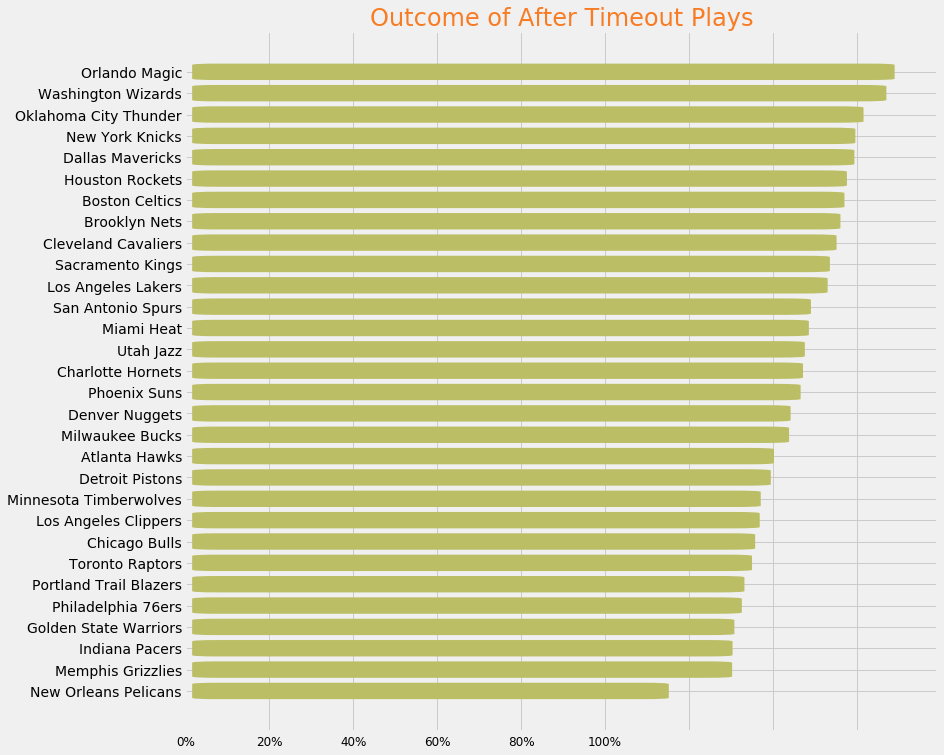

In [46]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.barh(y=concated_pcts.index, width=concated_pcts.MADE_PCT, label='Shots Made', color=olive_green)
new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color=patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                        abs(bb.width), abs(bb.height),
                        boxstyle="round,pad=-0.0040,rounding_size=0.015",
                        ec="none", fc=color,
                        mutation_aspect=4
                        )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)
ax.set_title("Outcome of After Timeout Plays", color=bball_orange, size=24)

ax.set_xticklabels([f"{item}%" for item in range(0, 110, 20)], size=12)


## Best executors ATO

In [34]:
merged_data = pd.read_csv('play_by_plays/merged_data.csv')

In [35]:
made_shots = merged_data.loc[merged_data.EVENTMSGTYPE_PLAY == 1]

In [36]:
missed_shots = merged_data.loc[merged_data.EVENTMSGTYPE_PLAY == 2]

In [37]:
shot_made_counts_id = made_shots.PLAYER1_ID.value_counts()
shot_missed_counts_id = missed_shots.PLAYER1_ID.value_counts()

In [38]:
shots_made_frame = shot_made_counts_id.to_frame(name="MADE_COUNT")
shots_missed_frame = shot_missed_counts_id.to_frame(name="MISSED_COUNT")

In [39]:
#shots_made_frame.reset_index(level=0, inplace=True)
shots_made_frame['PLAYER1_ID'] = shots_made_frame.index
shots_made_frame = shots_made_frame.reset_index(level=0, drop=True)

shots_missed_frame['PLAYER1_ID'] = shots_missed_frame.index
shots_missed_frame = shots_missed_frame.reset_index(level=0, drop=True)

In [40]:
merged_shots = pd.merge(shots_made_frame, shots_missed_frame)

In [41]:
ato_executors = pd.merge(left=merged_shots, right=merged_data.loc[:, ['PLAYER1_ID', 'PLAYER1_NAME']], on='PLAYER1_ID', how='left').drop_duplicates()

In [42]:
ato_executors.loc[:, "TOTAL_COUNT"] = ato_executors.MADE_COUNT + ato_executors.MISSED_COUNT

In [43]:
ato_executors = ato_executors.sort_values(by='TOTAL_COUNT', ascending=False)

In [44]:
ato_executors.loc[:, "PERCENTAGE"] = ato_executors.MADE_COUNT / ato_executors.TOTAL_COUNT

In [45]:
top_executors = ato_executors.iloc[:100]

In [46]:
top_twenty = top_executors.iloc[:20]

In [47]:
most_efficient = top_twenty.sort_values(by='PERCENTAGE', ascending=False).iloc[:5]
least_efficient = top_twenty.sort_values(by='PERCENTAGE').iloc[:5]

In [48]:
most_shots = top_executors.iloc[:15]

In [49]:
other = top_executors.loc[~top_executors.PLAYER1_ID.isin(most_shots.PLAYER1_ID.tolist())]

In [50]:
dropped_dups = other.drop_duplicates(subset=['MADE_COUNT', 'TOTAL_COUNT'])

In [51]:
most_shots

,MADE_COUNT,PLAYER1_ID,MISSED_COUNT,PLAYER1_NAME,TOTAL_COUNT,PERCENTAGE
0,38,203999,40,Nikola Jokic,78,0.487179
94,35,203078,42,Bradley Beal,77,0.454545
464,26,203897,43,Zach LaVine,69,0.376812
972,25,202699,38,Tobias Harris,63,0.396825
391,27,202710,35,Jimmy Butler,62,0.435484
667,25,201942,32,DeMar DeRozan,57,0.438596
783,25,203925,32,Joe Harris,57,0.438596
186,33,203944,23,Julius Randle,56,0.589286
1109,23,2544,31,LeBron James,54,0.425926
255,31,203915,23,Spencer Dinwiddie,54,0.574074


In [192]:
popstar = '#B6465F'
pastel_pink = '#DA9F93'

15

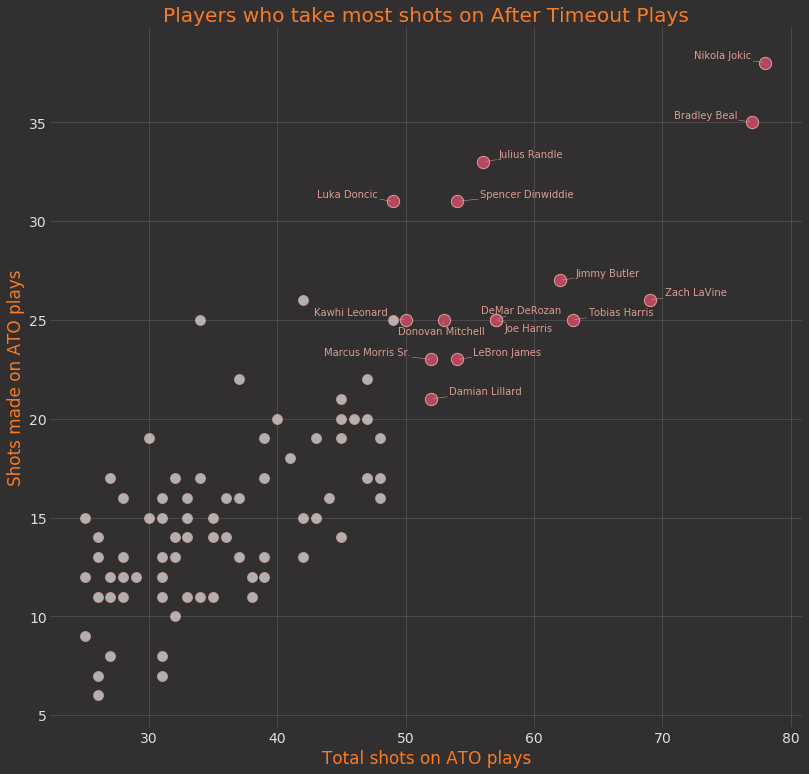

In [53]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.scatter(x=dropped_dups.TOTAL_COUNT, y=dropped_dups.MADE_COUNT, s=100, alpha=0.75, edgecolors=pastel_pink, lw=1, color=bball_white)
ax.scatter(x=most_shots.TOTAL_COUNT, y=most_shots.MADE_COUNT, s=150, alpha=1, edgecolors=pastel_pink, lw=1, color=popstar)
#ax.scatter(x=least_efficient.TOTAL_COUNT, y=least_efficient.MADE_COUNT, s=200, alpha=1, edgecolors=light_cyan, lw=1, color=screamin_green)
ax.set_xlabel("Total shots on ATO plays", color=bball_orange)
ax.set_ylabel("Shots made on ATO plays", color=bball_orange)
ax.set_title("Players who take most shots on After Timeout Plays", color=bball_orange)

#ax.set_xticklabels([f"{item}%" for item in range(32, 52, 2)], size=12)
#ax.set_yticklabels([f"{item}%" for item in range(20, 90, 10)], size=12)

texts = []
for index in range(len(most_shots)):
    item = most_shots.iloc[index]
    texts.append(ax.text(x=item.TOTAL_COUNT, y=item.MADE_COUNT, s=item.PLAYER1_NAME, size=10, color=pastel_pink))

ax.set_facecolor(bball_gray)
fig.set_facecolor(bball_gray)
ax.set_frame_on(False)
ticks = ax.get_xticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ticks = ax.get_yticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ax.grid(b=True, color=bball_white, alpha=0.3, lw=0.5)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color=pastel_pink), expand_points=(1.5, 1.5))

## Assisted vs Unassisted

In [71]:
assisted_makes = merged_data.loc[(merged_data.EVENTMSGTYPE_PLAY == 1) & (merged_data.PLAYER2_ID != 0)]

In [72]:
unassisted_makes = merged_data.loc[(merged_data.EVENTMSGTYPE_PLAY == 1) & (merged_data.PLAYER2_ID == 0)]

In [77]:
unassisted_makes_frame = unassisted_makes.PLAYER1_ID.value_counts().to_frame(name="UNASSISTED_MAKES")
unassisted_makes_frame['PLAYER1_ID'] = unassisted_makes_frame.index
unassisted_makes_frame = unassisted_makes_frame.reset_index(level=0, drop=True)

In [79]:
assisted_makes_frame = assisted_makes.PLAYER1_ID.value_counts().to_frame(name="ASSISTED_MAKES")
assisted_makes_frame['PLAYER1_ID'] = assisted_makes_frame.index
assisted_makes_frame = assisted_makes_frame.reset_index(level=0, drop=True)

In [83]:
merged_ast_data = pd.merge(assisted_makes_frame, unassisted_makes_frame, on='PLAYER1_ID')

In [85]:
names_ast_data = pd.merge(left=merged_ast_data, right=merged_data.loc[:, ['PLAYER1_ID', 'PLAYER1_NAME']], on='PLAYER1_ID', how='left').drop_duplicates()

In [87]:
names_ast_data.loc[:, "TOTAL_MAKES"] = names_ast_data.ASSISTED_MAKES + names_ast_data.UNASSISTED_MAKES

In [92]:
top_total_makes = names_ast_data.sort_values(by='TOTAL_MAKES', ascending=False).iloc[:30]

14

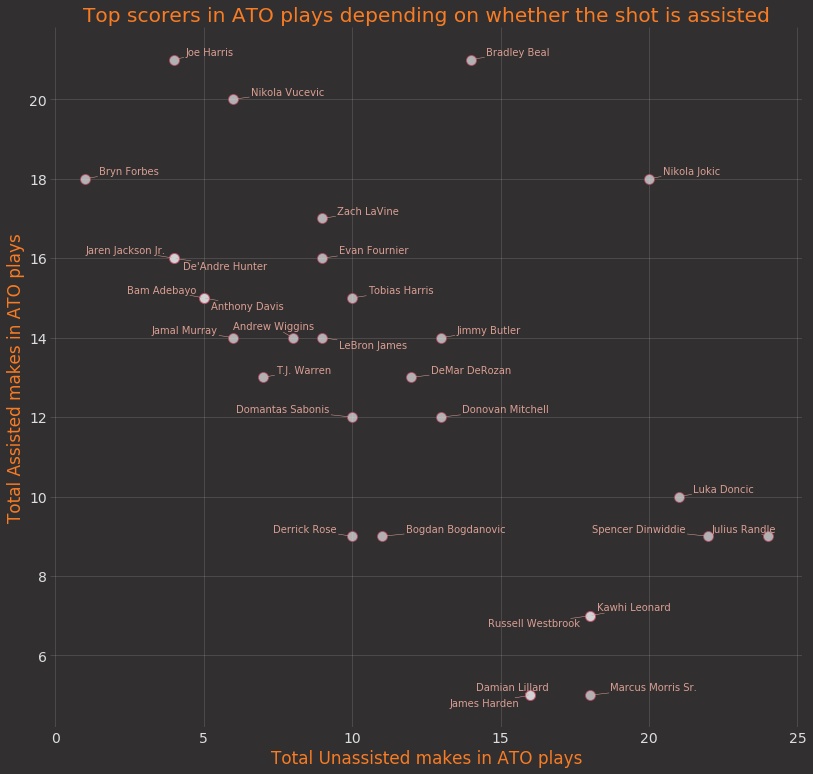

In [97]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(x=top_total_makes.UNASSISTED_MAKES, y=top_total_makes.ASSISTED_MAKES, s=100, alpha=0.75, edgecolors=popstar, lw=1, color=bball_white)
#ax.scatter(x=top_total_makes.UNASSISTED_MAKES, y=top_total_makes.MADE_COUNT, s=150, alpha=1, edgecolors=pastel_pink, lw=1, color=popstar)
#ax.scatter(x=least_efficient.TOTAL_COUNT, y=least_efficient.MADE_COUNT, s=200, alpha=1, edgecolors=light_cyan, lw=1, color=screamin_green)
ax.set_xlabel("Total Unassisted makes in ATO plays", color=bball_orange)
ax.set_ylabel("Total Assisted makes in ATO plays", color=bball_orange)
ax.set_title("Top scorers in ATO plays depending on whether the shot is assisted", color=bball_orange)

#ax.set_xticklabels([f"{item}%" for item in range(32, 52, 2)], size=12)
#ax.set_yticklabels([f"{item}%" for item in range(20, 90, 10)], size=12)

texts = []
for index in range(len(top_total_makes)):
    item = top_total_makes.iloc[index]
    texts.append(ax.text(x=item.UNASSISTED_MAKES, y=item.ASSISTED_MAKES, s=item.PLAYER1_NAME, size=10, color=pastel_pink))

ax.set_facecolor(bball_gray)
fig.set_facecolor(bball_gray)
ax.set_frame_on(False)
ticks = ax.get_xticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ticks = ax.get_yticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ax.grid(b=True, color=bball_white, alpha=0.3, lw=0.5)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color=pastel_pink), expand_points=(1.5, 1.5))

## Non Filtered


In [25]:
data_df = pd.read_csv('play_by_plays/ato_filtered.csv')

In [26]:
data_df.EVENTMSGTYPE.value_counts()

2    4047
1    3121
5    1307
6    1136
Name: EVENTMSGTYPE, dtype: int64

In [171]:
fourth_quarter = data_df.loc[data_df.PERIOD >= 4]

In [172]:
fourth_qt_makes = fourth_quarter.loc[fourth_quarter.EVENTMSGTYPE == 1].PLAYER1_ID.value_counts()
fourth_qt_misses_tos = fourth_quarter.loc[(fourth_quarter.EVENTMSGTYPE == 2)].PLAYER1_ID.value_counts()

In [173]:
fourth_qt_makes = fourth_qt_makes.to_frame("MADE_SHOTS")
fourth_qt_misses_tos = fourth_qt_misses_tos.to_frame("MISSED_SHOTS")

In [174]:
merged_fourth_qt = pd.merge(fourth_qt_makes, fourth_qt_misses_tos, left_index=True, right_index=True)

In [175]:
merged_fourth_qt['PLAYER1_ID'] = merged_fourth_qt.index

In [176]:
merged_fourth_qt = merged_fourth_qt.reset_index(level=0, drop=True)

In [177]:
names_only = data_df.loc[:, ["PLAYER1_ID", "PLAYER1_NAME"]].drop_duplicates()

In [178]:
fourth_qt_final = pd.merge(merged_fourth_qt, names_only, on="PLAYER1_ID")

In [179]:
fourth_qt_final.loc[:, "TOTAL"] = fourth_qt_final.MADE_SHOTS + fourth_qt_final.MISSED_SHOTS

In [180]:
fourth_qt_ato = fourth_qt_final.sort_values(by="TOTAL", ascending=False)

In [181]:
fourth_qt_ato = fourth_qt_ato.iloc[:50]

In [182]:
most_shots = fourth_qt_ato.iloc[:20]

In [194]:
plt.style.use('fivethirtyeight')

14

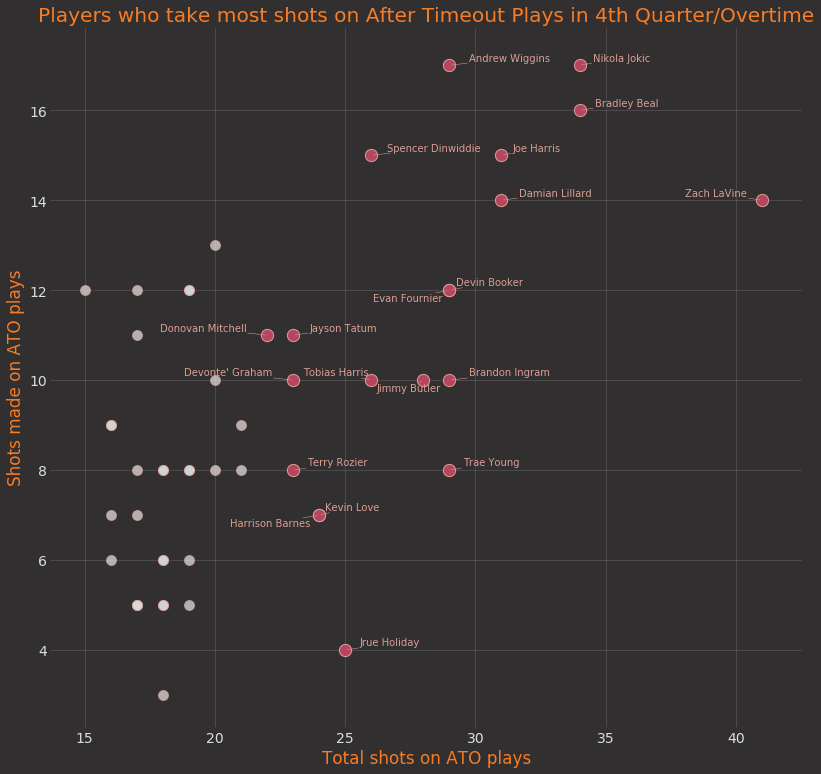

In [198]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.scatter(x=fourth_qt_ato.TOTAL, y=fourth_qt_ato.MADE_SHOTS, s=100, alpha=0.75, edgecolors=pastel_pink, lw=1, color=bball_white)
ax.scatter(x=most_shots.TOTAL, y=most_shots.MADE_SHOTS, s=150, alpha=1, edgecolors=pastel_pink, lw=1, color=popstar)
#ax.scatter(x=least_efficient.TOTAL_COUNT, y=least_efficient.MADE_COUNT, s=200, alpha=1, edgecolors=light_cyan, lw=1, color=screamin_green)
ax.set_xlabel("Total shots on ATO plays", color=bball_orange)
ax.set_ylabel("Shots made on ATO plays", color=bball_orange)
ax.set_title("Players who take most shots on After Timeout Plays in 4th Quarter/Overtime", color=bball_orange)

#ax.set_xticklabels([f"{item}%" for item in range(32, 52, 2)], size=12)
#ax.set_yticklabels([f"{item}%" for item in range(20, 90, 10)], size=12)

texts = []
for index in range(len(most_shots)):
    item = most_shots.iloc[index]
    texts.append(ax.text(x=item.TOTAL, y=item.MADE_SHOTS, s=item.PLAYER1_NAME, size=10, color=pastel_pink))

ax.set_facecolor(bball_gray)
fig.set_facecolor(bball_gray)
ax.set_frame_on(False)

ticks = ax.get_xticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ticks = ax.get_yticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ax.grid(b=True, color=bball_white, alpha=0.3, lw=0.5)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color=pastel_pink), expand_points=(1.5, 1.5))